In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
from datetime import timedelta
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sqlalchemy import create_engine

%pylab inline
%load_ext sql

engine = create_engine('postgresql://localhost:5432/kylesdb')

plt.rcParams['figure.figsize'] = (14, 8)

Populating the interactive namespace from numpy and matplotlib


/Users/kyletoomey/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/kyletoomey/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
Tesla = pd.read_sql("select * from tesla", engine)
Tesla.rename(index=str, columns={'Date':"TEdate", 'Open': 'TEopen', 'High':'TEhigh', 'Low':'TElow','Close':'TEclose', 'Volume':'TEvol'}, inplace=True)
GM = pd.read_sql("select * from \"GM\"", engine)
GM.rename(index=str, columns={'Date':"GMdate", 'Open': 'GMopen', 'High':'GMhigh', 'Low':'GMlow','Close':'GMclose', 'Volume':'GMvol'}, inplace=True)
Ford = pd.read_sql("select * from \"ford\"", engine)
Ford.rename(index=str, columns={'Date':"Fdate", 'Open': 'Fopen', 'High':'Fhigh', 'Low':'Flow','Close':'Fclose', 'Volume':'Fvol'}, inplace=True)
Daimler = pd.read_sql("select * from \"daimler\"", engine)
Daimler.rename(index=str, columns={'Date':"Ddate", 'Open': 'Dopen', 'High':'Dhigh', 'Low':'Dlow','Close':'Dclose', 'Volume':'Dvol'}, inplace=True)
Toyota = pd.read_sql("select * from \"toyota\"", engine)
Toyota.rename(index=str, columns={'Date':"TOdate", 'Open': 'TOopen', 'High':'TOhigh', 'Low':'TOlow','Close':'TOclose', 'Volume':'TOvol'}, inplace=True)
Solar = pd.read_sql("select * from \"solar\"", engine)
Solar.rename(index=str, columns={'Date':"Sdate", 'Open': 'Sopen', 'High':'Shigh', 'Low':'Slow','Close':'Sclose', 'Volume':'Svol'}, inplace=True)
SP_500 = pd.read_sql("select * from \"sp_500\"", engine)
SP_500.rename(index=str, columns={'Date':"SPdate", 'Open': 'SPopen', 'High':'SPhigh', 'Low':'SPlow','Close':'SPclose', 'Volume':'SPvol', 'Adj Close': 'SPadj_clo' }, inplace=True)
Nasdaq = pd.read_sql("select * from \"nasdaq\"", engine)
Nasdaq.rename(index=str, columns={'Date':"NQdate", 'Open': 'NQopen', 'High':'NQhigh', 'Low':'NQlow','Close':'NQclose', 'Volume':'NQvol', 'Adj Close': 'NQadj_clo' }, inplace=True)
Nasdaq.drop('NQadj_clo', axis=1, inplace=True)
SP_500.drop('SPadj_clo', axis=1, inplace=True)

In [3]:
a=pd.merge(SP_500, Nasdaq, right_index=True, left_index=True)
b=pd.merge(Solar,a,right_index=True, left_index=True)
c=pd.merge(Toyota,b,right_index=True, left_index=True)
d=pd.merge(Daimler,c,right_index=True, left_index=True)
e=pd.merge(Ford,d,right_index=True, left_index=True)
f=pd.merge(GM,e,right_index=True, left_index=True)
master=pd.merge(Tesla,f,right_index=True, left_index=True)

In [4]:
master.head()

,TEdate,TEopen,TEhigh,TElow,TEclose,TEvol,GMdate,GMopen,GMhigh,GMlow,...,SPhigh,SPlow,SPclose,SPvol,NQdate,NQopen,NQhigh,NQlow,NQclose,NQvol
0,2015-01-02 00:00:00-05:00,222.87,223.25,213.26,219.31,4764443,2015-01-02 00:00:00-05:00,35.27,35.31,34.41,...,2072.360107,2046.040039,2058.199951,2708700000,2015-01-02 00:00:00-05:00,4760.240234,4777.009766,4698.109863,4726.810059,1435150000
1,2015-01-05 00:00:00-05:00,214.55,216.50,207.16,210.09,5368477,2015-01-05 00:00:00-05:00,34.98,35.25,34.07,...,2054.439941,2017.339966,2020.579956,3799120000,2015-01-05 00:00:00-05:00,4700.339844,4702.770020,4641.459961,4652.569824,1794470000
2,2015-01-06 00:00:00-05:00,210.06,214.20,204.21,211.28,6261936,2015-01-06 00:00:00-05:00,34.41,35.22,34.10,...,2030.250000,1992.439941,2002.609985,4460110000,2015-01-06 00:00:00-05:00,4666.850098,4667.330078,4567.589844,4592.740234,2167320000
3,2015-01-07 00:00:00-05:00,213.35,214.78,209.78,210.95,2968390,2015-01-07 00:00:00-05:00,35.23,35.95,35.04,...,2029.609985,2005.550049,2025.900024,3805480000,2015-01-07 00:00:00-05:00,4626.839844,4652.720215,4613.899902,4650.470215,1957950000
4,2015-01-08 00:00:00-05:00,212.81,213.80,210.01,210.62,3442509,2015-01-08 00:00:00-05:00,36.06,36.45,35.80,...,2064.080078,2030.609985,2062.139893,3934010000,2015-01-08 00:00:00-05:00,4689.540039,4741.379883,4688.020020,4736.189941,2105450000


# EDA #

In [5]:
pd.set_option('display.max_columns', 50)
master.corr()[master.corr()>.5]

,TEopen,TEhigh,TElow,TEclose,TEvol,GMopen,GMhigh,GMlow,GMclose,GMvol,Fopen,Fhigh,Flow,Fclose,Fvol,Dopen,Dhigh,Dlow,Dclose,Dvol,TOopen,TOhigh,TOlow,TOclose,TOvol,Sopen,Shigh,Slow,Sclose,Svol,SPopen,SPhigh,SPlow,SPclose,SPvol,NQopen,NQhigh,NQlow,NQclose,NQvol
TEopen,1.000000,0.990692,0.991009,0.982114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEhigh,0.990692,1.000000,0.989147,0.992872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TElow,0.991009,0.989147,1.000000,0.991746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEclose,0.982114,0.992872,0.991746,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEvol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMopen,NaN,NaN,NaN,NaN,NaN,1.000000,0.996494,0.993140,0.990145,NaN,0.826083,0.819816,0.834223,0.820116,NaN,0.798507,0.798476,0.801177,0.798934,NaN,0.778129,0.775649,0.785049,0.777804,NaN,0.573065,0.567410,0.584447,0.577227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMhigh,NaN,NaN,NaN,NaN,NaN,0.996494,1.000000,0.993338,0.995088,NaN,0.823519,0.821485,0.833645,0.823382,NaN,0.797225,0.798389,0.800565,0.799275,NaN,0.774988,0.773828,0.782368,0.776505,NaN,0.570622,0.566653,0.582667,0.576898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMlow,NaN,NaN,NaN,NaN,NaN,0.993140,0.993338,1.000000,0.994995,NaN,0.818416,0.813576,0.836756,0.819424,NaN,0.786301,0.786656,0.791385,0.788698,NaN,0.767638,0.765252,0.778035,0.769785,NaN,0.553551,0.546970,0.567788,0.559611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMclose,NaN,NaN,NaN,NaN,NaN,0.990145,0.995088,0.994995,1.000000,NaN,0.818036,0.817464,0.833841,0.825362,NaN,0.789829,0.791436,0.794752,0.794264,NaN,0.768495,0.768030,0.778359,0.773324,NaN,0.558665,0.554938,0.572485,0.567433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see a strong correlation between the top 4 auto makers (daimler, toyotoa, ford, and GM). There is also a partial correlation with solar city and these stocks.

In [6]:
master.corr()[master.corr()<-.5]

,TEopen,TEhigh,TElow,TEclose,TEvol,GMopen,GMhigh,GMlow,GMclose,GMvol,Fopen,Fhigh,Flow,Fclose,Fvol,Dopen,Dhigh,Dlow,Dclose,Dvol,TOopen,TOhigh,TOlow,TOclose,TOvol,Sopen,Shigh,Slow,Sclose,Svol,SPopen,SPhigh,SPlow,SPclose,SPvol,NQopen,NQhigh,NQlow,NQclose,NQvol
TEopen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEhigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TElow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMopen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMhigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMvol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modeling #

In [7]:
target= master['TEclose']
target.shape

(447,)

In [8]:
features= master.ix[0:,'GMdate':]

In [9]:
features.shape

(447, 42)

In [10]:
features=features.drop(['Fdate','Ddate','TOdate','Sdate','SPdate','NQdate'], axis=1)

In [11]:
print features.shape
print features.GMdate.dtypes

(447, 36)
object


In [12]:
features['GMdate']= features.GMdate.convert_objects()

/Users/kyletoomey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


![mean squared error](MSE.svg)

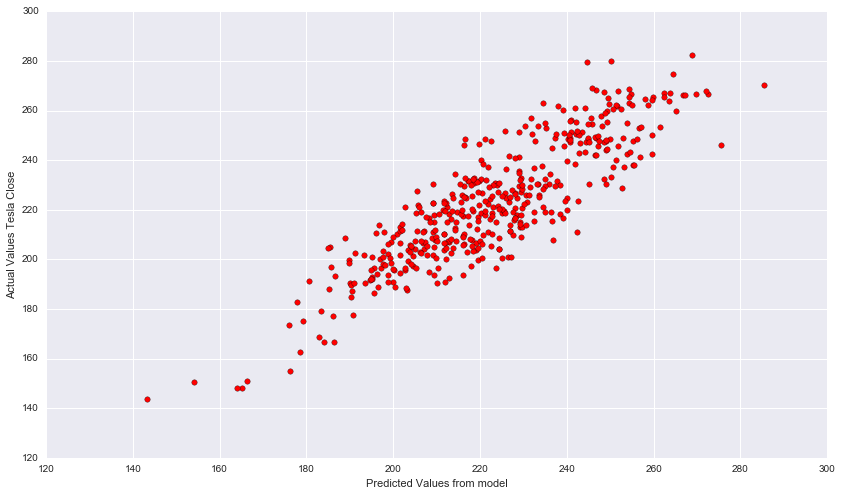

MSE: 138.314583709


In [13]:
lm = linear_model.LinearRegression()

X = features.ix[:,'GMopen':]
y = target
y_mean= np.mean(y)

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(predictions, y, s=30, c='r', marker='o', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Tesla Close")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

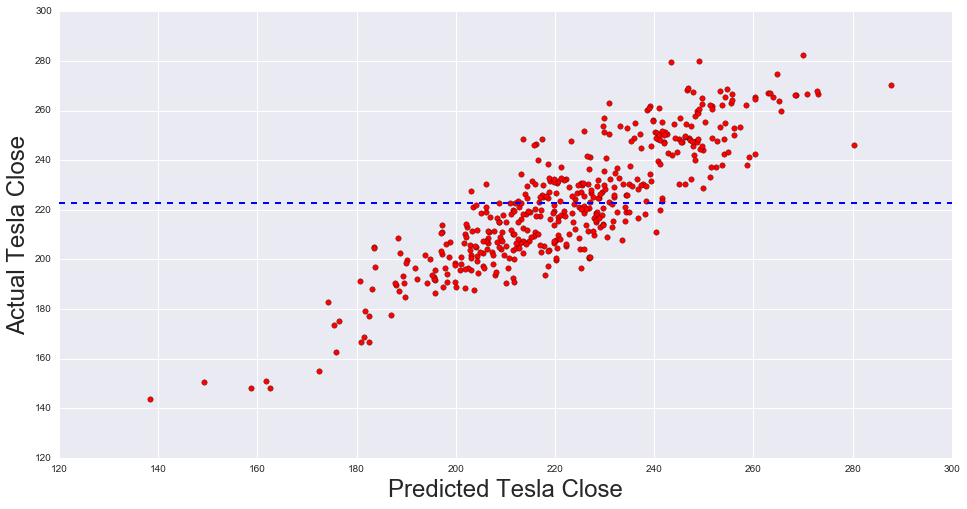

MSE: 140.970089878


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TEclose   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4188.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        21:12:59   Log-Likelihood:                -1740.3
No. Observations:                 447   AIC:                             3551.
Df Residuals:                     412   BIC:                             3694.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GMopen        -3.4577      4.006     -0.863      0.389       -11.332     4.417
GMhigh         0.2227      4.838      0.046      0.963        -9.287     9.733
GMlow         -3.6546      4.892     -0.747      0.455       -13.271     5.962
GMclose        1.8994      4.345      0.437      0.662        -6.641    10.440
GMvol      -1.729e-07   1.37e-07     -1.258      0.209     -4.43e-07  9.73e-08
Fopen         -1.8295      9.435     -0.194      0.846       -20.375    16.717
Fhigh         12.7759     13.332      0.958      0.338       -13.431    38.983
Flow          -3.7104      9.804     -0.378      0.705       -22.982    15.561
Fclose        -1.4881     11.145     -0.134      0.894       -23.395    20.419
Fvol       -9.642e-08    6.2e-08     -1.556      0.120     -2.18e-07  2.54e-08
Dopen          1.2697      1.368      0.928      0.354        -1.420     3.960
Dhigh          2.6427      2.112      1.251      0.212        -1.509     6.795
Dlow          -3.8327      1.811     -2.116      0.035        -7.392    -0.273
Dclose         0.9741      2.138      0.456      0.649        -3.228     5.176
Dvol       -3.225e-05   1.86e-05     -1.733      0.084     -6.88e-05  4.34e-06
TOopen        -0.6310      2.172     -0.291      0.772        -4.901     3.639
TOhigh        -1.3929      2.609     -0.534      0.594        -6.521     3.736
TOlow          3.3467      2.454      1.364      0.173        -1.477     8.170
TOclose       -3.8009      2.643     -1.438      0.151        -8.996     1.394
TOvol      -2.704e-06   3.94e-06     -0.686      0.493     -1.05e-05  5.04e-06
Sopen          0.6474      0.955      0.678      0.498        -1.229     2.524
Shigh          0.3228      1.151      0.281      0.779        -1.939     2.585
Slow          -0.6253      1.264     -0.495      0.621        -3.111     1.860
Sclose         1.2943      1.125      1.151      0.250        -0.916     3.505
Svol       -6.761e-07   2.45e-07     -2.756      0.006     -1.16e-06 -1.94e-07
SPopen        -0.0858      0.104     -0.822      0.411        -0.291     0.119
SPhigh        -0.0312      0.201     -0.155      0.877        -0.427     0.364
SPlow          0.0838      0.205      0.409      0.682        -0.318     0.486
SPclose       -0.0385      0.252     -0.153      0.879        -0.534     0.457
SPvol       -1.04e-09   1.97e-09     -0.529      0.597      -4.9e-09  2.82e-09
NQopen         0.0512      0.047      1.096      0.274        -0.041     0.143
NQhigh         0.0505      0.077      0.653      0.514        -0.102     0.203
NQlow         -0.0511      0.078     -0.657      0.512        -0.204     0.102
NQclose        0.0718      0.092      0.779      0.436        -0.109     0.253
NQvol        5.05e-09   3.98e-09      1.270      0.205     -2.77e-09  1.29e-08
==============================================================================
Om

In [14]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(16,8))

plt.scatter(predictions, y, s=30, c='r', marker='o')

plt.axhline(y_mean, color='b', linestyle='dashed', linewidth=2)

plt.xlabel("Predicted Tesla Close", fontsize=24)

plt.ylabel("Actual Tesla Close", fontsize=24)

plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

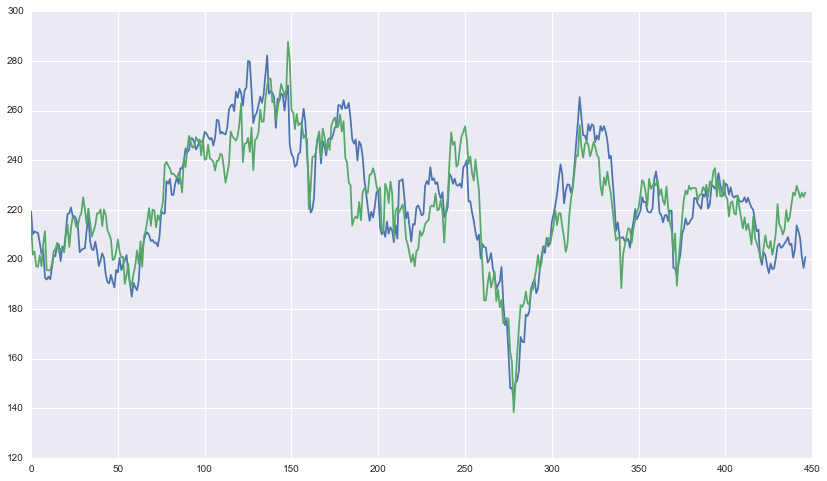

In [26]:
plt.plot(master['TEclose'])
plt.plot(predictions)